# Exercise 6.3: Neural Networks in Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# See https://keras.io/
# for extennsive documentation
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import regularizers


Let us visit the problem of wine quality prediction previously encountered one final time. After linear regression and a self-made network, we can now explore the comfort provided by the Keras library.

In [ ]:
# The code snippet below is responsible for downloading the dataset to
# Google. You can directly download the file using the link
# if you work with a local anaconda setup
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [2]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# normalize features
for i in range(11):
    data[:,i] = (data[:,i]-np.mean(data[:,i]))/np.std(data[:,i])

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])


data: (4898, 12)
First example:
Features: [-0.4204731   0.11667379 -0.1999175  -0.9250474  -0.4931102  -0.6649702
 -1.39692757 -1.16945584  0.54133365  1.75397237  0.71981845]
Quality: 7.0


Below is the simple network from exercise 4.1 implemented using Keras. In addition to the network we define the loss function and optimiser.

In [3]:
# See: https://keras.io/api/models/sequential/ and
# https://keras.io/api/layers/core_layers/dense/
# We can use the Sequential class to very easiliy
# build a simple architecture
model = Sequential()
# 11 inputs, 20 outputs, relu
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01), input_dim=11, activation='relu'))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# 20 inputs (automatically detected by Keras), 1 output, linear activation
model.add(Dense(1, activation='linear'))

adam = keras.optimizers.Adam(learning_rate=0.01)

# Set loss function and optimiser algorithm
model.compile(loss='mse',  # mean squared error
              optimizer= adam, # stochastic gradient descent with momentum
              #optimizer='sgd' # stochastic gradient descent
              metrics=['mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Training and evaluation below

The code below trains the network for 5 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

In [4]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/100
47/47 [==============================] - 2s 12ms/step - loss: 5.8690 - mse: 3.7722 - val_loss: 2.9968 - val_mse: 1.6670
Epoch 2/100
47/47 [==============================] - 0s 7ms/step - loss: 1.8071 - mse: 0.8723 - val_loss: 1.2690 - val_mse: 0.6354
Epoch 3/100
47/47 [==============================] - 0s 6ms/step - loss: 1.0673 - mse: 0.5870 - val_loss: 1.2255 - val_mse: 0.8612
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 0.9419 - mse: 0.6491 - val_loss: 0.9220 - val_mse: 0.6875
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 0.7980 - mse: 0.5957 - val_loss: 0.7200 - val_mse: 0.5481
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: 0.7886 - mse: 0.6331 - val_loss: 0.7579 - val_mse: 0.6182
Epoch 7/100
47/47 [==============================] - 0s 6ms/step - loss: 0.7621 - mse: 0.6350 - val_loss: 0.8251 - val_mse: 0.7101
Epoch 8/100
47/47 [==============================] - 0s 6ms/step - loss: 0.6967 - 

In [5]:
# The history object returned by the model training above
# contains the values of the loss function (the mean-squared-error)
# at different epochs
# We discard the first epoch as the loss value is very high,
# obscuring the rest of the distribution
train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

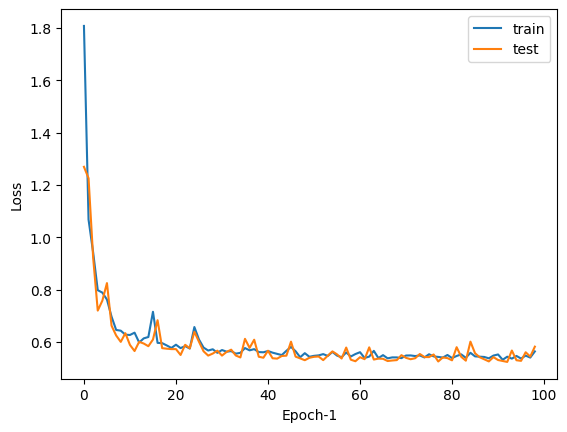

In [6]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epoch-1")
plt.ylabel("Loss")
plt.show()

 1/60 [..............................] - ETA: 1s

60/60 [==============================] - 0s 3ms/step
Correlation coefficient: 0.6071833792584829


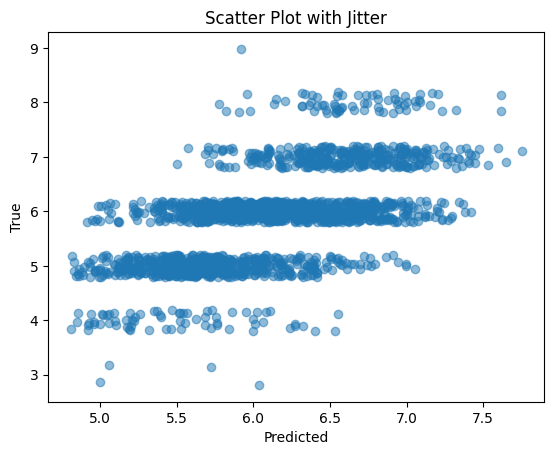

In [9]:
# After the training:

# Prepare scatter plot
y_pred = model.predict(X_test)[:,0]
jitter = 0.2
y_pred_jitter = y_pred + np.random.uniform(-jitter,jitter,size=y_pred.shape)
y_test_jitter = y_test + np.random.uniform(-jitter,jitter,size=y_test.shape)

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_jitter,y_test_jitter, alpha = 0.5)
plt.title("Scatter Plot with Jitter")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Problems

* Use the notebook as starting point. It already contains the simple network from Exercise 4.1 implemented in Keras.

* Currently, SGD is used without momentum. Try training with a momentum term. Replace SGD with the Adam optimizer and train using that. (See: https://keras.io/api/optimizers/)
* Add two more hidden layers to the network (you can choose the number of nodes but make sure to apply the ReLu activation function after each) and train again.
* Test differet numbers of examples (i.e. change the batch batch size) to be simulataneously used by the network.
* (bonus) optimize the network architecture to get the best correlation coefficient. (Let's see who gets the most out of the data).

Generall Comment

